### Credit Card Clustering using Machine Learning

In [3]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)

In [5]:
data = pd.read_csv('Credit-card-data\Credit_card_data\CC_GENERAL.csv')

data.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\ajaym\AppData\Local\Temp\ipykernel_3252\3649332267.py:1: SyntaxWarning: invalid escape sequence '\C'
  data = pd.read_csv('Credit-card-data\Credit_card_data\CC_GENERAL.csv')


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
data.shape

(8950, 18)

In [6]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [9]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data = data.dropna()

## There are three features in the dataset which are very valuable for the task of credit card segmentation:

#### BALANCE

#### PURCHASES

#### CREDIT_LIMIT

### These three features are enough to group credit card holders as they tell us about the buying history, bank balance, and credit limit of the credit card holders

In [17]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [18]:
clustering_data = data[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']]

In [19]:
clustering_data.head()

,BALANCE,PURCHASES,CREDIT_LIMIT
0,40.900749,95.40,1000.0
1,3202.467416,0.00,7000.0
2,2495.148862,773.17,7500.0
4,817.714335,16.00,1200.0
5,1809.828751,1333.28,1800.0


In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [21]:
clustering_data.head()

,BALANCE,PURCHASES,CREDIT_LIMIT
0,40.900749,95.40,1000.0
1,3202.467416,0.00,7000.0
2,2495.148862,773.17,7500.0
4,817.714335,16.00,1200.0
5,1809.828751,1333.28,1800.0


In [60]:
ms = MinMaxScaler()

In [64]:
clustering_data[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']]

clustering_data = pd.DataFrame(ms.fit_transform(clustering_data))

In [66]:
clustering_data.head()

,0,1,2
0,0.002148,0.001945,0.031720
1,0.168169,0.000000,0.232053
2,0.131026,0.015766,0.248748
3,0.042940,0.000326,0.038397
4,0.095038,0.027188,0.058431


In [69]:
from sklearn.cluster import KMeans

In [73]:
kmeans = KMeans(n_clusters = 5)

In [75]:
clusters = kmeans.fit_predict(clustering_data)

In [89]:
data['CREDIT_CARD_SEGMENTS'] = clusters

In [93]:
data['CREDIT_CARD_SEGMENTS'].unique()

array([0, 1, 3, 2, 4])

In [97]:
data['CREDIT_CARD_SEGMENTS'] = data['CREDIT_CARD_SEGMENTS'].map({0 : 'cluster_1', 1 : 'cluster_2', 2 : 'cluster_3', 3 : 'cluster_4', 4 : 'cluster_5'})

In [101]:
data['CREDIT_CARD_SEGMENTS'].unique()

array(['cluster_1', 'cluster_2', 'cluster_4', 'cluster_3', 'cluster_5'],
      dtype=object)

In [122]:
cluster_1_data = data[data['CREDIT_CARD_SEGMENTS'] == 'cluster_1']

In [128]:
cluster_1_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_CARD_SEGMENTS
0,C10001,40.900749,0.818182,95.40,0.0,95.40,0.0,0.166667,0.000000,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12,cluster_1
4,C10005,817.714335,1.000000,16.00,16.0,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,1,1200.0,678.334763,244.791237,0.0,12,cluster_1
5,C10006,1809.828751,1.000000,1333.28,0.0,1333.28,0.0,0.666667,0.000000,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.0,12,cluster_1
7,C10008,1823.652743,1.000000,436.20,0.0,436.20,0.0,1.000000,0.000000,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.0,12,cluster_1
10,C10011,1293.124939,1.000000,920.12,0.0,920.12,0.0,1.000000,0.000000,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.0,12,cluster_1


In [130]:
cluster_2_data = data[data['CREDIT_CARD_SEGMENTS'] == 'cluster_2']

In [132]:
cluster_2_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_CARD_SEGMENTS
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.0,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,cluster_2
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.0,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,cluster_2
15,C10016,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.5,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,cluster_2
19,C10020,3577.970933,1.000000,398.64,0.00,398.64,0.000000,1.0,0.000000,1.000000,0.000000,0,12,4000.0,1053.980464,12465.549380,0.000000,12,cluster_2
23,C10024,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.0,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,cluster_2


In [134]:
cluster_3_data = data[data['CREDIT_CARD_SEGMENTS'] == 'cluster_3']

In [136]:
cluster_3_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_CARD_SEGMENTS
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,cluster_3
13,C10014,921.693369,1.000000,2137.93,419.96,1717.97,0.000000,0.750000,0.166667,0.750000,0.000000,0,26,7500.0,1655.891435,251.137986,0.083333,12,cluster_3
29,C10030,22.063490,1.000000,100.00,0.00,100.00,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,6900.0,160.767773,159.684442,0.000000,12,cluster_3
31,C10032,1162.273324,1.000000,1347.71,400.00,947.71,175.815755,1.000000,0.083333,1.000000,0.166667,2,45,6000.0,645.998299,256.848991,0.000000,12,cluster_3
39,C10040,1411.602230,0.454545,963.24,963.24,0.00,6173.682877,0.083333,0.083333,0.000000,0.333333,6,6,7500.0,20071.075440,719.948985,0.333333,12,cluster_3


In [138]:
cluster_4_data = data[data['CREDIT_CARD_SEGMENTS'] == 'cluster_4']

In [142]:
cluster_4_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_CARD_SEGMENTS
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.0,1.000000,1.000000,1.000000,0.0,0,64,13500.0,6354.314328,198.065894,1.000000,12,cluster_4
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.0,0.166667,0.166667,0.000000,0.0,0,3,11000.0,1164.770591,100.302262,0.000000,12,cluster_4
18,C10019,1989.072228,1.000000,504.35,166.00,338.35,0.0,0.666667,0.083333,0.583333,0.0,0,9,13000.0,1720.837373,744.613395,0.000000,12,cluster_4
76,C10080,1727.638449,1.000000,606.11,606.11,0.00,0.0,1.000000,1.000000,0.000000,0.0,0,17,11000.0,2959.920544,623.656993,0.000000,12,cluster_4
82,C10086,3.786310,0.636364,133.05,28.20,104.85,0.0,0.416667,0.166667,0.250000,0.0,0,5,12000.0,210.053432,99.533735,0.444444,12,cluster_4


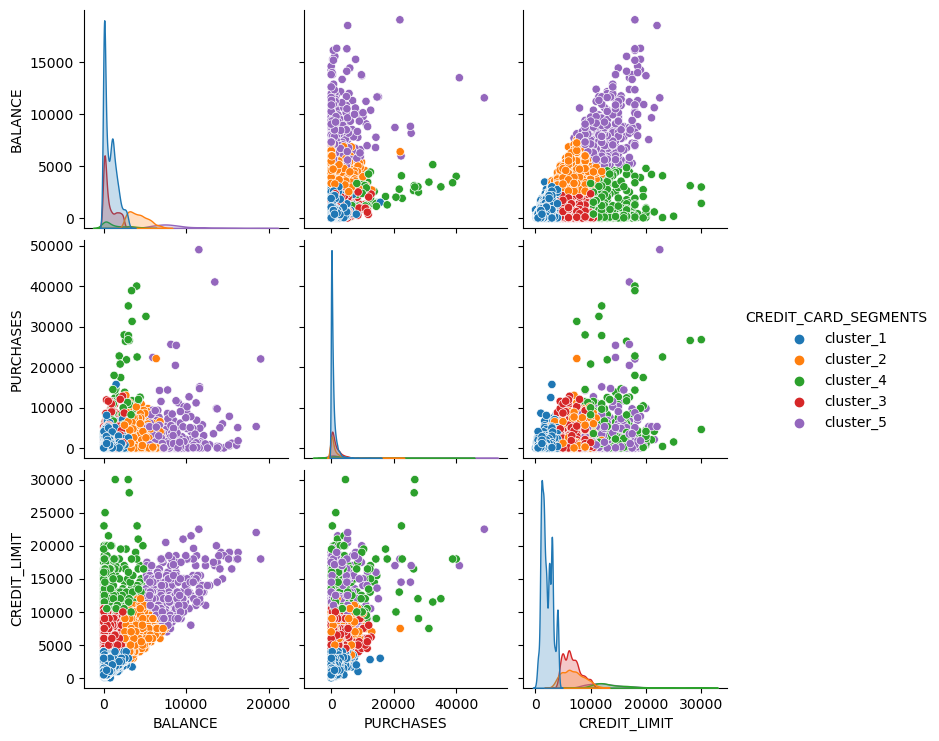

In [189]:
sns.pairplot(data[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'CREDIT_CARD_SEGMENTS']], hue = 'CREDIT_CARD_SEGMENTS')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [25]:
# Example dataset (replace with your own data)
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [83]:
import pandas as pd
train_df = pd.read_csv('artifacts//data_transformation//transformed_train_df.csv')

In [84]:
train_df.head()

,BALANCE,PURCHASES,CREDIT_LIMIT
0,0.008744,0.012276,0.081803
1,0.171255,0.000000,0.215359
2,0.027751,0.000000,0.031720
3,0.001304,0.046507,0.065109
4,0.188987,0.001294,0.198664


In [85]:
train_df.isnull().sum()

BALANCE         0
PURCHASES       0
CREDIT_LIMIT    1
dtype: int64

In [86]:
train_df.shape

(7160, 3)

In [87]:
train_df.dropna(inplace=True)

In [88]:
train_df.shape

(7159, 3)

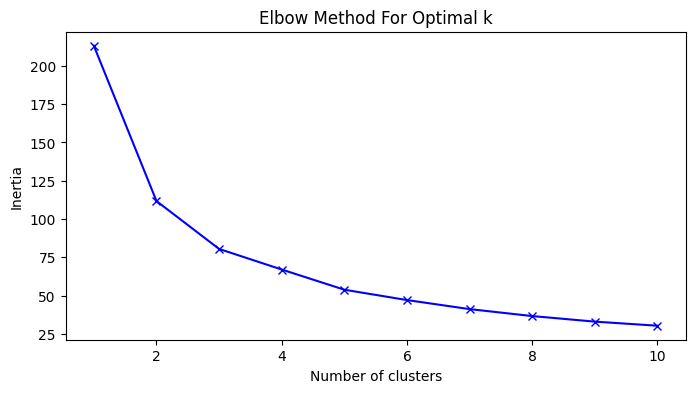

[1 0 1 ... 1 1 1]
Silhouette Score: 0.5617238408302405
Davies-Bouldin Index: 0.8960572743792379
Calinski-Harabasz Index: 6495.909577048241


In [93]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(train_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Assuming the elbow point is at k=4 (you should determine this from the plot)
optimal_k = 2

# # Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42).fit(train_df)
labels = kmeans.labels_

print(labels)

# # Calculate internal validation metrics
silhouette_avg = silhouette_score(train_df, labels)
db_index = davies_bouldin_score(train_df, labels)
ch_index = calinski_harabasz_score(train_df, labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {db_index}')
print(f'Calinski-Harabasz Index: {ch_index}')
